<a href="https://colab.research.google.com/github/vijaypanchal054/vijaypanchal054/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NETFLIX MOVIES AND TV SHOWS CLUSTERING**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset in CSV format to Pandas Dataframe and basic data analyis.**

In [ ]:
# Importing the data from the csv file.
netflix = pd.read_csv('/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# **Getting basic information of the dataframe.**

In [ ]:
#Getting basic information about the data
netflix.shape ,
netflix.info() ,
netflix.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

# **Handling the Null values from the respective columns provided from the dataframe info().**

In [ ]:
#filling the Null/NaN values with Unknown in column director, cast and country and Unavailable in column date_added , rating and duration
netflix['director'].fillna('Unknown_Director', inplace= True)
netflix['cast'].fillna('Unknown_cast', inplace= True)
netflix['country'].fillna('Unknown_Country', inplace = True)
netflix['date_added'].fillna(pd.NaT, inplace= True)
netflix['rating'].fillna('Unavailable', inplace = True)
netflix['duration'].fillna('Unavailable', inplace= True)
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,[Unknown_Director],"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,[Jorge Michel Grau],"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,[Gilbert Chan],"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,[Shane Acker],"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,[Robert Luketic],"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### **Category wise data Analysis:**
Variaion of Content Creation across availabel content on the platform. (Bivariate)

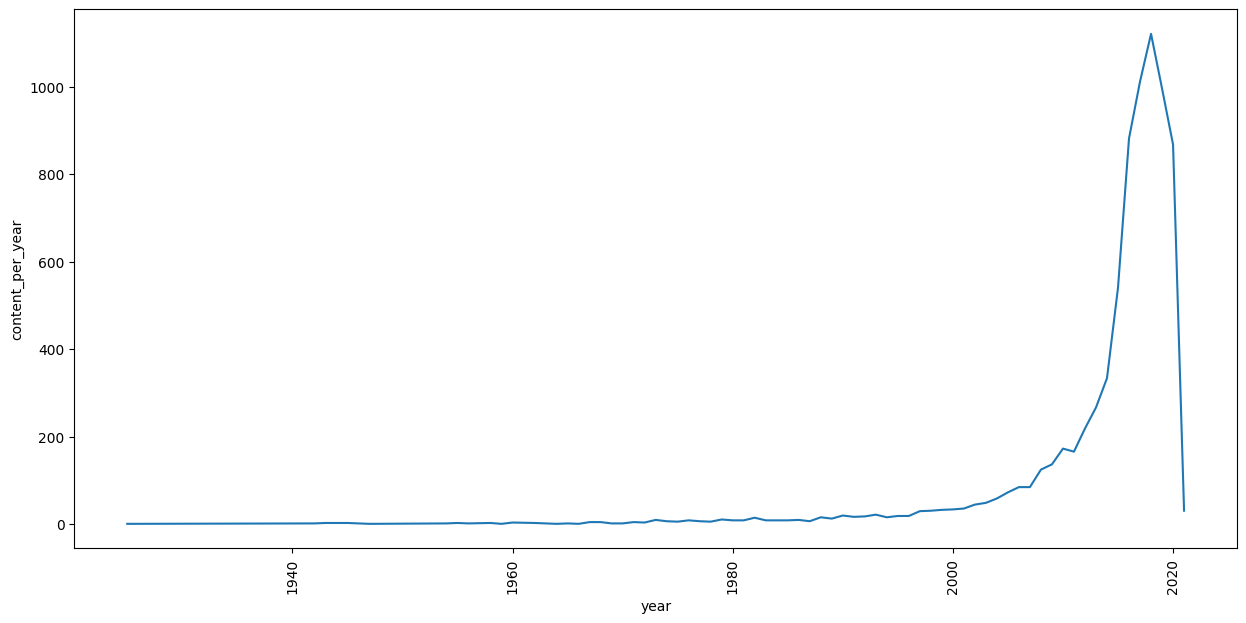

In [ ]:
#Count of the ahows across the year category
yearwise_data = pd.DataFrame(netflix['release_year'].value_counts().reset_index())
yearwise_data.columns = ['year', 'content_per_year']
plt.figure(figsize=(15,7))
sns.lineplot(data = yearwise_data,x = 'year', y = 'content_per_year')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
yearwise_data , yearwise_data1

(    year  content_per_year
 0   2018              1121
 1   2017              1012
 2   2019               996
 3   2016               882
 4   2020               868
 ..   ...               ...
 68  1925                 1
 69  1964                 1
 70  1966                 1
 71  1947                 1
 72  1959                 1
 
 [73 rows x 2 columns],
      release_year     type  count_show_id
 0            1925  TV Show              1
 1            1942    Movie              2
 2            1943    Movie              3
 3            1944    Movie              3
 4            1945    Movie              3
 ..            ...      ...            ...
 113          2019  TV Show            414
 114          2020    Movie            411
 115          2020  TV Show            457
 116          2021    Movie             12
 117          2021  TV Show             19
 
 [118 rows x 3 columns])

# **Variaion of Content Creation along with type of the content across availabel content on the platform. (Bivariate)**

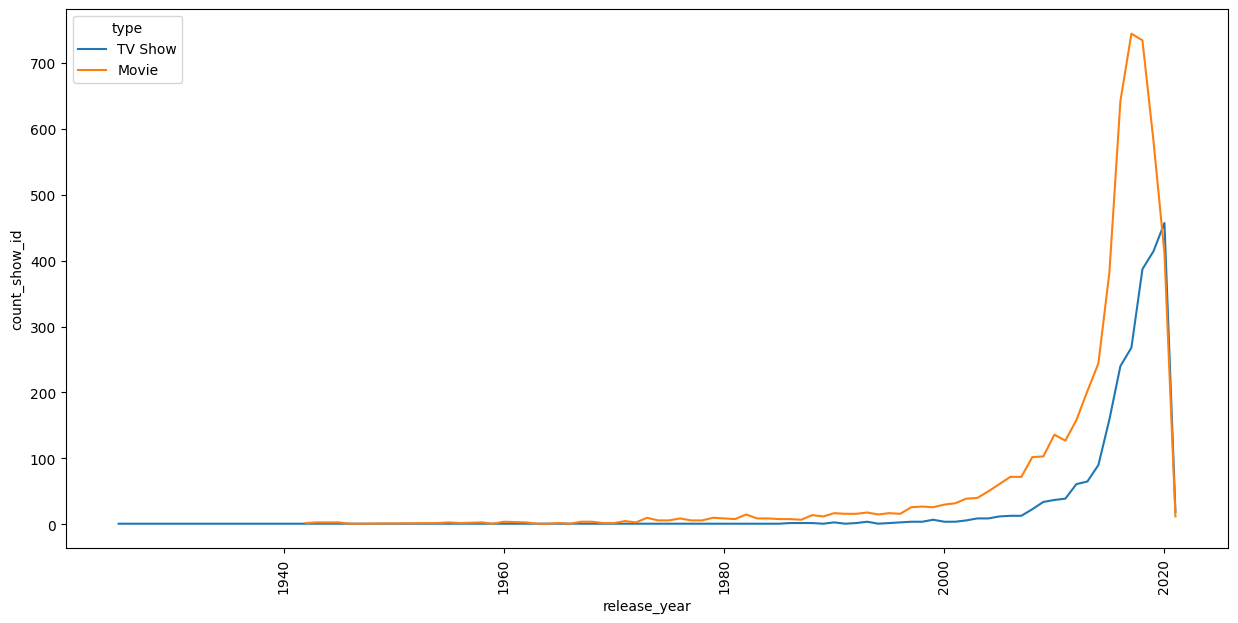

In [ ]:
#Comparative Count of Movies and TV-Series spread across the release_year
yearwise_data1 =pd.DataFrame(netflix.groupby(['release_year', 'type']).agg({'show_id' : 'count'})).reset_index()
yearwise_data1.columns = ['release_year', 'type', 'count_show_id']
plt.figure(figsize=(15,7))
sns.lineplot(data=yearwise_data1,x = 'release_year' , y = 'count_show_id' , hue = 'type')
plt.xticks(rotation = 90)
plt.show()

# **Transferring relevant data from rating attribute to duration attribute.**

In [ ]:
a = netflix[netflix['rating'].str.contains('min')].reset_index()
for i in range(len(a)):
    netflix.loc[a.iloc[i,0],'duration'] = a.loc[i,'rating']
    netflix.loc[a.iloc[i,0],'rating'] = 'Unavailable'
netflix[netflix['rating'].str.contains('min')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


# **Categorical Analysis according to 'rating' category. (Univariate)**

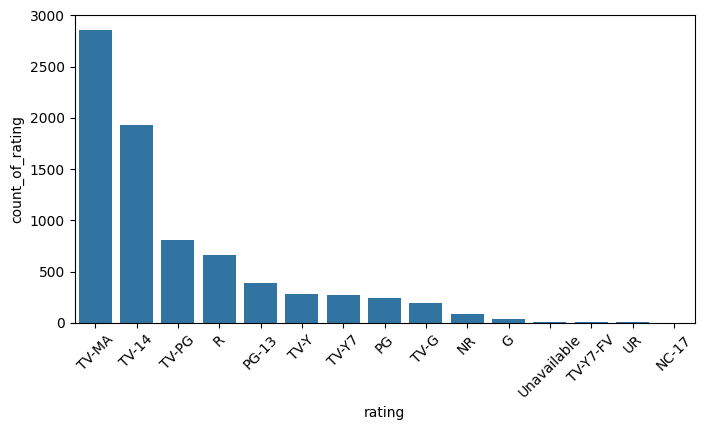

In [ ]:
# Count of the each show across the ratings category
rating_data = pd.DataFrame(netflix['rating'].value_counts().reset_index())
rating_data.columns = ['rating', 'count_of_rating']
plt.figure(figsize=(8,4))
sns.barplot(data = rating_data, x = 'rating' , y ='count_of_rating')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
rating_data

,rating,count_of_rating
0,TV-MA,2863
1,TV-14,1931
2,TV-PG,806
3,R,665
4,PG-13,386
5,TV-Y,280
6,TV-Y7,271
7,PG,247
8,TV-G,194
9,NR,84


# **Converting column date_added into the Year, Month , day and Week columns**

In [ ]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['year'] = netflix['date_added'].dt.year
netflix['month'] = netflix['date_added'].dt.month_name()
netflix['day'] = netflix['date_added'].dt.day
netflix['week'] = netflix['date_added'].dt.isocalendar().week

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 218. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

# **Count of the ahows across the addition week of the year category and Comparative Count of Movies and TV-Series spread across addition week and month of year (Bivariate)**

In [ ]:
weekwise_data = pd.DataFrame(netflix['week'].value_counts().reset_index())
weekwise_data.columns = ['week', 'content_per_week']
weekwise_data1 =pd.DataFrame(netflix.groupby(['week', 'type']).agg({'show_id' : 'count'})).reset_index()
weekwise_data1.columns = ['week', 'type', 'count_show_id']

fig, ax = plt.subplots(figsize=(15, 7))

sns.barplot(data = weekwise_data,x = 'week', y = 'content_per_week', ax =ax , color = 'lightblue', native_scale= 0.5)

sns.lineplot(data=weekwise_data1,x = 'week' , y = 'count_show_id' , hue = 'type',ax = ax, linewidth = 2)

x_axis_labels = [tick.get_text() for tick in ax.get_xticklabels()]
ax = plt.gca()
plt.xticks(rotation = 90)
plt.show()

KeyError: 'week'

In [ ]:
monthwise_data = pd.DataFrame(netflix['month'].value_counts().reset_index())
monthwise_data.columns = ['month', 'content_per_month']
monthwise_data1 =pd.DataFrame(netflix.groupby(['month', 'type']).agg({'show_id' : 'count'})).reset_index()
monthwise_data1.columns = ['month', 'type', 'count_show_id']

fig, ax = plt.subplots(figsize=(15, 7))

sns.barplot(data = monthwise_data,x = 'month', y = 'content_per_month', ax =ax , color = 'lightblue', native_scale= 0.5)

sns.lineplot(data=monthwise_data1,x = 'month' , y = 'count_show_id' , hue = 'type',ax = ax, linewidth = 2)

x_axis_labels = [tick.get_text() for tick in ax.get_xticklabels()]
ax = plt.gca()
plt.xticks(rotation = 90)
plt.show()

KeyError: 'month'

In [ ]:
weekwise_data , weekwise_data1

NameError: name 'weekwise_data' is not defined

In [ ]:
monthwise_data,monthwise_data1

NameError: name 'monthwise_data' is not defined

# **Unnesting of the data into the new dataframe**

In [ ]:
netflix_new = netflix
netflix_new['director'] = netflix_new['director'].str.split(', ')
netflix_new = netflix_new.explode('director')
netflix_new['cast'] = netflix_new['cast'].str.split(', ')
netflix_new = netflix_new.explode('cast')
netflix_new['country'] = netflix_new['country'].str.split(', ')
netflix_new = netflix_new.explode('country')
netflix_new['listed_in'] = netflix_new['listed_in'].str.split(', ')
netflix_new = netflix_new.explode('listed_in')
netflix_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown_Director,João Miguel,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...
0,s1,TV Show,3%,Unknown_Director,João Miguel,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,TV Dramas,In a future where the elite inhabit an island ...
0,s1,TV Show,3%,Unknown_Director,João Miguel,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,TV Sci-Fi & Fantasy,In a future where the elite inhabit an island ...
0,s1,TV Show,3%,Unknown_Director,Bianca Comparato,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...
0,s1,TV Show,3%,Unknown_Director,Bianca Comparato,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,TV Dramas,In a future where the elite inhabit an island ...


In [ ]:
netflix_new.drop('description', axis = 1,inplace = True)

# **finding most common director in TV show and in movies separately (Top 10 in both category) (Univariate)**

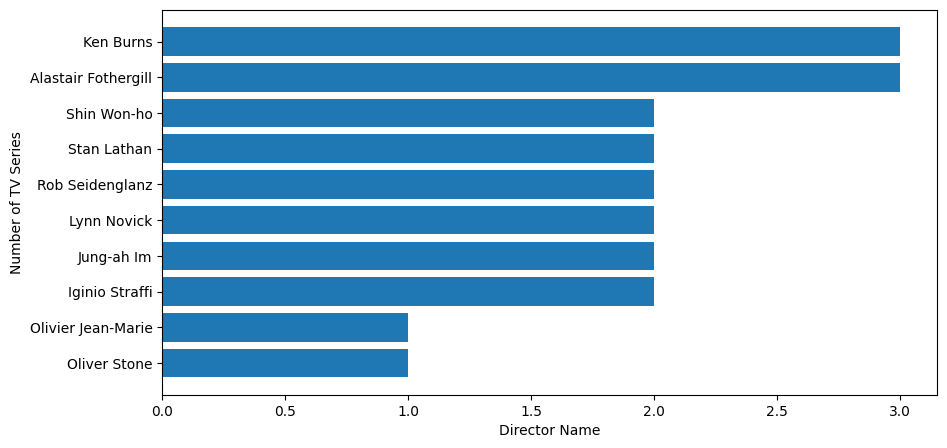

In [ ]:
dir_TV_top = pd.DataFrame(netflix_new.loc[(netflix_new['type'] == 'TV Show') & (netflix_new['director'] != 'Unknown_Director')].groupby('director').agg({'title':'nunique'}))
dir_TV_top = dir_TV_top.reset_index().sort_values('title',ascending = False).iloc[:10,:].iloc[::-1,:]
plt.figure(figsize=(10,5))
plt.barh(dir_TV_top['director'], dir_TV_top['title'])
plt.xlabel('Director Name')
plt.ylabel('Number of TV Series')
plt.show()

In [ ]:
dir_TV_top

,director,title
152,Oliver Stone,1
153,Olivier Jean-Marie,1
78,Iginio Straffi,2
105,Jung-ah Im,2
126,Lynn Novick,2
179,Rob Seidenglanz,2
195,Stan Lathan,2
189,Shin Won-ho,2
4,Alastair Fothergill,3
108,Ken Burns,3


# **finding most common director in TV show and in movies separately (Top 10 in both category) (Univariate)**

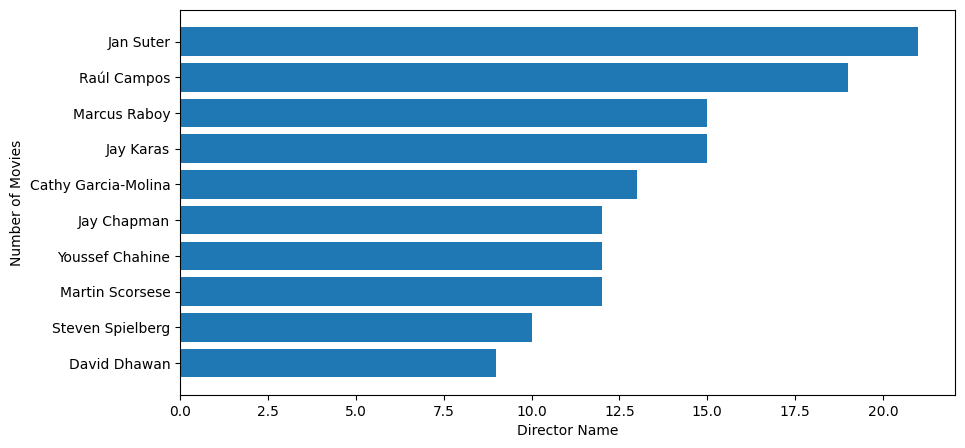

In [ ]:
dir_movie_top = pd.DataFrame(netflix_new.loc[(netflix_new['type'] == 'Movie') & (netflix_new['director'] != 'Unknown_Director')].groupby('director').agg({'title':'nunique'}))
dir_movie_top = dir_movie_top.reset_index().sort_values('title',ascending = False).iloc[:10,:].iloc[::-1,:]
plt.figure(figsize=(10,5))
plt.barh(dir_movie_top['director'], dir_movie_top['title'])
plt.xlabel('Director Name')
plt.ylabel('Number of Movies')
plt.show()

In [ ]:
dir_movie_top

,director,title
934,David Dhawan,9
3823,Steven Spielberg,10
2548,Martin Scorsese,12
4264,Youssef Chahine,12
1689,Jay Chapman,12
667,Cathy Garcia-Molina,13
1692,Jay Karas,15
2478,Marcus Raboy,15
3274,Raúl Campos,19
1649,Jan Suter,21


# **Genrewise Produced Contents (Univariate)**

In [ ]:
netflix_new.rename(columns={'listed_in' : 'Genre'},inplace= True)

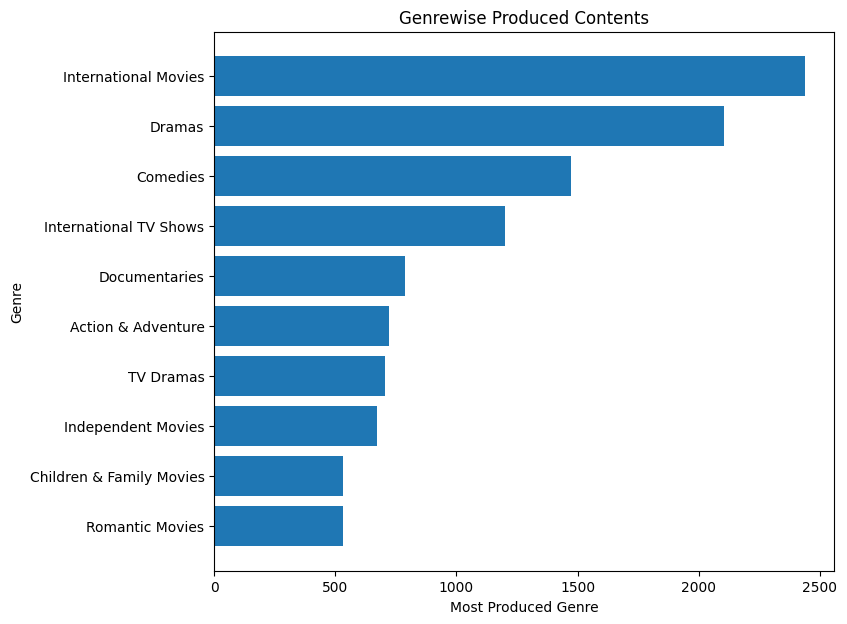

In [ ]:
b = pd.DataFrame(netflix_new.groupby('Genre').agg({'title' : 'nunique'})).sort_values(by = 'title',ascending=False).reset_index()
b = b.iloc[9::-1,:]
plt.figure(figsize=(8,7))
plt.barh(width= b['title'], y = b['Genre'])
plt.ylabel('Genre')
plt.xlabel('Most Produced Genre')
plt.title('Genrewise Produced Contents')
plt.show()

In [ ]:
b

,Genre,title
9,Romantic Movies,531
8,Children & Family Movies,532
7,Independent Movies,673
6,TV Dramas,704
5,Action & Adventure,721
4,Documentaries,786
3,International TV Shows,1199
2,Comedies,1471
1,Dramas,2106
0,International Movies,2437


# **Genrewise Produced TV Shows (Univariate)**

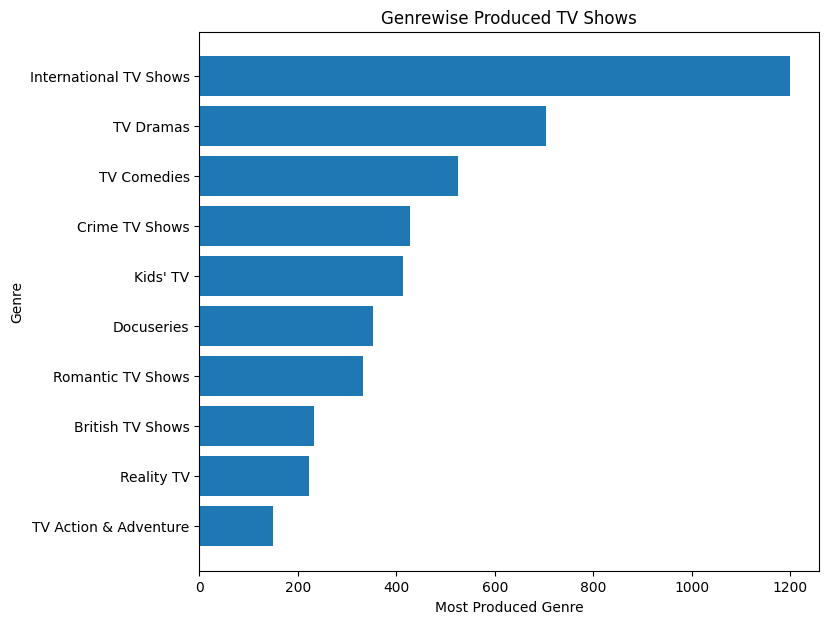

In [ ]:
c = pd.DataFrame(netflix_new[netflix_new['type'] == 'TV Show'].groupby('Genre').agg({'title' : 'nunique'})).sort_values(by = 'title',ascending=False).reset_index()
c = c.iloc[9::-1,:]
plt.figure(figsize=(8,7))
plt.barh(width= c['title'], y = c['Genre'])
plt.ylabel('Genre')
plt.xlabel('Most Produced Genre')
plt.title('Genrewise Produced TV Shows')
plt.show()

In [ ]:
c

,Genre,title
9,TV Action & Adventure,150
8,Reality TV,222
7,British TV Shows,232
6,Romantic TV Shows,333
5,Docuseries,353
4,Kids' TV,414
3,Crime TV Shows,427
2,TV Comedies,525
1,TV Dramas,704
0,International TV Shows,1199


# **Genrewise Produced Movie (Univariate)**

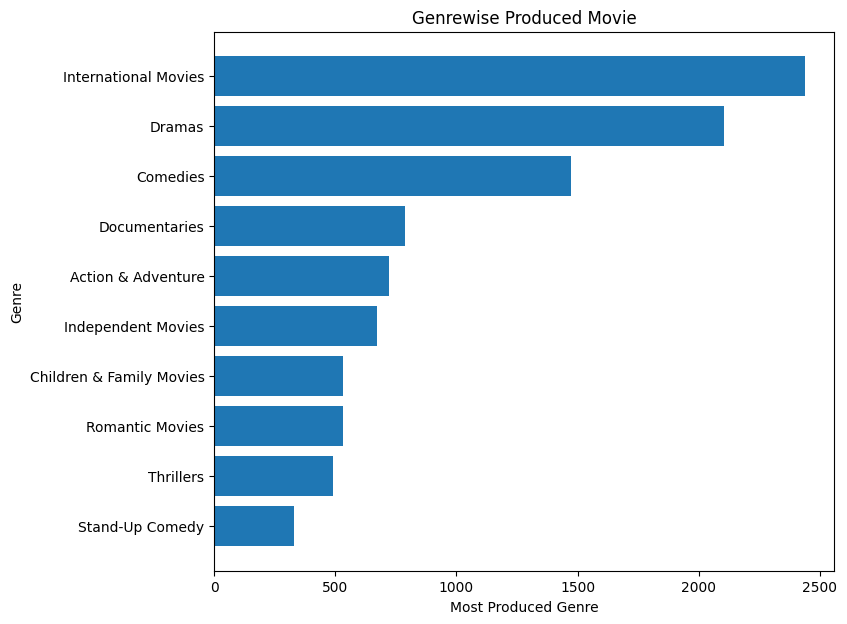

In [ ]:
d = pd.DataFrame(netflix_new[netflix_new['type'] == 'Movie'].groupby('Genre').agg({'title' : 'nunique'})).sort_values(by = 'title',ascending=False).reset_index()
d = d.iloc[9::-1,:]
plt.figure(figsize=(8,7))
plt.barh(width= d['title'], y = d['Genre'])
plt.ylabel('Genre')
plt.xlabel('Most Produced Genre')
plt.title('Genrewise Produced Movie')
plt.show()

In [ ]:
d

,Genre,title
9,Stand-Up Comedy,329
8,Thrillers,491
7,Romantic Movies,531
6,Children & Family Movies,532
5,Independent Movies,673
4,Action & Adventure,721
3,Documentaries,786
2,Comedies,1471
1,Dramas,2106
0,International Movies,2437


# **Most Common Actor/Actress across all content types (Univariate)**

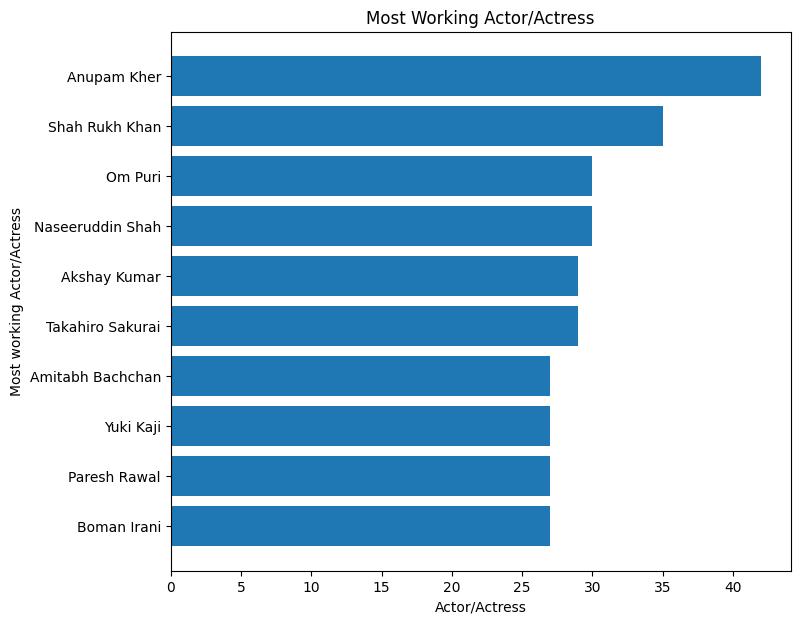

In [ ]:
b_actor = pd.DataFrame(netflix_new.loc[(netflix_new['cast'] != 'Unknown_cast')].groupby('cast').agg({'title' : 'nunique'})).sort_values(by = 'title',ascending=False).reset_index()
b_actor = b_actor.iloc[9::-1,:]
plt.figure(figsize=(8,7))
plt.barh(width= b_actor['title'], y = b_actor['cast'])
plt.xlabel('Actor/Actress')
plt.ylabel('Most working Actor/Actress')
plt.title('Most Working Actor/Actress')
plt.show()

In [ ]:
b_actor

,cast,title
9,Boman Irani,27
8,Paresh Rawal,27
7,Yuki Kaji,27
6,Amitabh Bachchan,27
5,Takahiro Sakurai,29
4,Akshay Kumar,29
3,Naseeruddin Shah,30
2,Om Puri,30
1,Shah Rukh Khan,35
0,Anupam Kher,42


# **Most Common Actor/Actress across TV Shows (Univariate)**

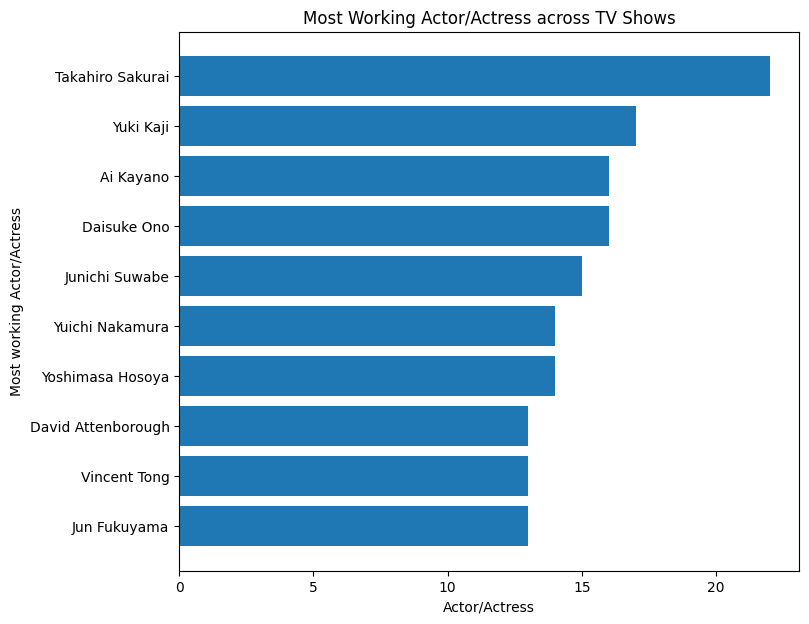

In [ ]:
c_actor = pd.DataFrame(netflix_new.loc[(netflix_new['cast'] != 'Unknown_cast') & (netflix_new['type'] == 'TV Show')].groupby('cast').agg({'title' : 'nunique'})).sort_values(by = 'title',ascending=False).reset_index()
c_actor = c_actor.iloc[9::-1,:]
plt.figure(figsize=(8,7))
plt.barh(width= c_actor['title'], y = c_actor['cast'])
plt.xlabel('Actor/Actress')
plt.ylabel('Most working Actor/Actress')
plt.title('Most Working Actor/Actress across TV Shows')
plt.show()

In [ ]:
c_actor

,cast,title
9,Jun Fukuyama,13
8,Vincent Tong,13
7,David Attenborough,13
6,Yoshimasa Hosoya,14
5,Yuichi Nakamura,14
4,Junichi Suwabe,15
3,Daisuke Ono,16
2,Ai Kayano,16
1,Yuki Kaji,17
0,Takahiro Sakurai,22


# **Most Common Actor/Actress across Movie (Univariate)**

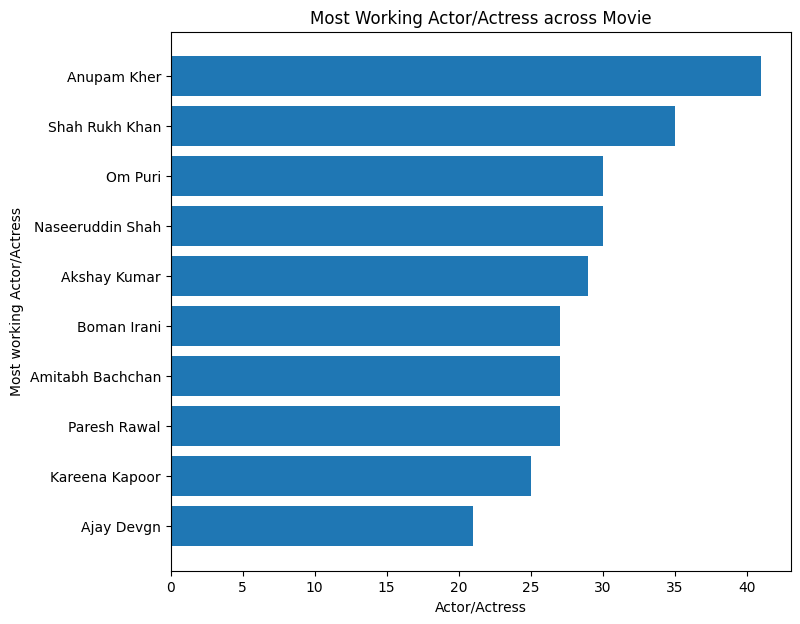

In [ ]:
c_actor = pd.DataFrame(netflix_new.loc[(netflix_new['cast'] != 'Unknown_cast') & (netflix_new['type'] == 'Movie')].groupby('cast').agg({'title' : 'nunique'})).sort_values(by = 'title',ascending=False).reset_index()
c_actor = c_actor.iloc[9::-1,:]
plt.figure(figsize=(8,7))
plt.barh(width= c_actor['title'], y = c_actor['cast'])
plt.xlabel('Actor/Actress')
plt.ylabel('Most working Actor/Actress')
plt.title('Most Working Actor/Actress across Movie')
plt.show()

# **Release Time vs Platform release time Analysis (Bivariate)**

In [ ]:
netflix['time_diff'] = (netflix['year']-netflix['release_year'])
sns.scatterplot(data = netflix, x = 'release_year', y = 'time_diff')
plt.xlabel('Release Year')
plt.ylabel('Time(in Year)')
plt.title('Time Taken to Release on Netflix')
plt.show()

KeyError: 'year'

In [ ]:
netflix['time_diff']

KeyError: 'time_diff'

In [ ]:
netflix_new['duration'] = netflix_new['duration'].str.lower()

In [ ]:
tv_duration = pd.DataFrame(netflix_new[netflix['type'] == 'TV Show'].groupby('duration').agg({'title':'nunique'})).sort_values('title',ascending = False).reset_index()
tv_duration.rename(columns= {'title' : 'duration_count'},inplace= True)
print(tv_duration)

      duration  duration_count
0     1 season            1608
1    2 seasons             382
2    3 seasons             184
3    4 seasons              87
4    5 seasons              58
5    6 seasons              30
6    7 seasons              19
7    8 seasons              18
8    9 seasons               8
9   10 seasons               6
10  11 seasons               3
11  12 seasons               2
12  13 seasons               2
13  15 seasons               2
14  16 seasons               1


<ipython-input-81-7c430145e7b2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tv_duration = pd.DataFrame(netflix_new[netflix['type'] == 'TV Show'].groupby('duration').agg({'title':'nunique'})).sort_values('title',ascending = False).reset_index()


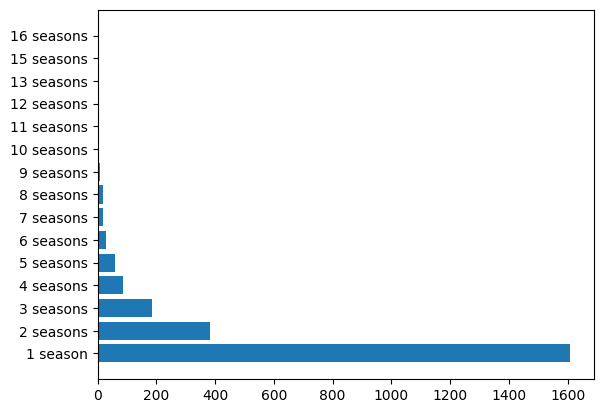

In [ ]:
plt.barh(width = tv_duration['duration_count'], y =tv_duration['duration'])
plt.show()

In [ ]:
mv_duration = pd.DataFrame(netflix_new[netflix['type'] == 'Movie'].groupby('duration').agg({'title':'nunique'})).sort_values('title',ascending = False).reset_index()
mv_duration.rename(columns= {'title' : 'duration_count'},inplace= True)
mv_duration['duration'] = mv_duration['duration'].astype(str).str.replace(r'\s*mins?$', '', regex=True)
mv_duration['duration'] = mv_duration['duration'].astype(int)
bins = [0,20,40,60,90,120,150,330]
labels = ['0-20','21-40','41-60','61-90','91-120','121-150','150-max']
mv_duration['time_category'] = pd.cut(mv_duration['duration'],bins = bins, labels = labels)
mv_duration.drop('duration',axis = 1,inplace = True)
mv_duration = pd.DataFrame(mv_duration.groupby('time_category').agg({'duration_count' : 'sum'})).sort_values('duration_count').reset_index()
print(mv_duration)

  time_category  duration_count
0          0-20              24
1         21-40             135
2       150-max             226
3         41-60             287
4       121-150             785
5         61-90            1343
6        91-120            2577


<ipython-input-83-011214feecfe>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mv_duration = pd.DataFrame(netflix_new[netflix['type'] == 'Movie'].groupby('duration').agg({'title':'nunique'})).sort_values('title',ascending = False).reset_index()


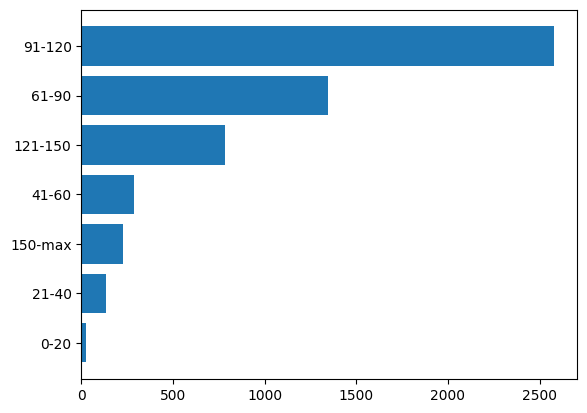

In [ ]:
plt.barh(width = mv_duration['duration_count'],y = mv_duration['time_category'])
plt.show()